In [23]:
import sys
sys.path.append('/Users/sdbykov/work/self-supervised-halos/')

In [24]:
import requests
import numpy as np
import h5py
from tqdm import tqdm
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

from utils.data.tng_query import get, HaloInfo, subhalos_df, subhalos_mass_history
from utils.utils import data_path, res_path, set_mpl
set_mpl()

data_path = data_path+'tng/'

matplotlib settings set


# Exploratory analysis

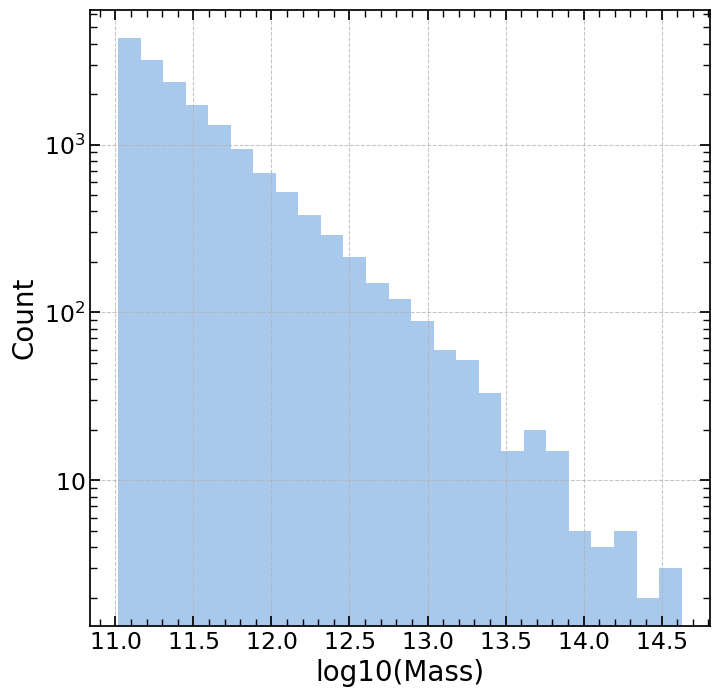

In [25]:
x = subhalos_df['logSubhaloMass']

plt.hist(x, bins=25)
plt.yscale('log')
plt.xlabel('log10(Mass)')
plt.ylabel('Count')
plt.show()

In [37]:
from utils.data.tng_query import HaloInfo
from matplotlib.backends.backend_pdf import PdfPages

n_to_plot = 20

#set seed for reproducibility
np.random.seed(111)
#test_ids = subhalos_df.sample(n_to_plot).index
#instead of random sample, split subhalos into 10 groups by log mass and take two from each group randomly
subhalos_df['mass_group'] = pd.cut(subhalos_df['logSubhaloMass'], 10, labels=False)
test_ids = []
for i in range(10):
    group = subhalos_df[subhalos_df['mass_group']==i]
    test_ids.extend(group.sample(2).index)
    

halo_dict = {}

with PdfPages(res_path+'plots/halo_examples.pdf') as pdf:

    for i, id in enumerate(test_ids[::-1]):
        halo = HaloInfo(id)
        dens = halo.make_3d_density()
        fig, _ = halo.plot_all(dens, compact=True)

        pdf.savefig(fig)

        plt.close(fig)

        halo_dict[id] = halo


Using precomputed histogram: 144093


/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:317: RuntimeWarning: divide by zero encountered in log10
  if ax is None:


Using precomputed histogram: 24681
Using precomputed histogram: 200667
Using precomputed histogram: 122842
Using precomputed histogram: 268813
Using precomputed histogram: 274535
Using precomputed histogram: 405560
Using precomputed histogram: 377311
Using precomputed histogram: 515604
Using precomputed histogram: 489757
Using precomputed histogram: 580180
Using precomputed histogram: 540773
Using precomputed histogram: 634793
Using precomputed histogram: 653553
Using precomputed histogram: 758466
Using precomputed histogram: 770598
Using precomputed histogram: 853987
Using precomputed histogram: 794521
Using precomputed histogram: 881273
Using precomputed histogram: 910394


# Explore mass histories

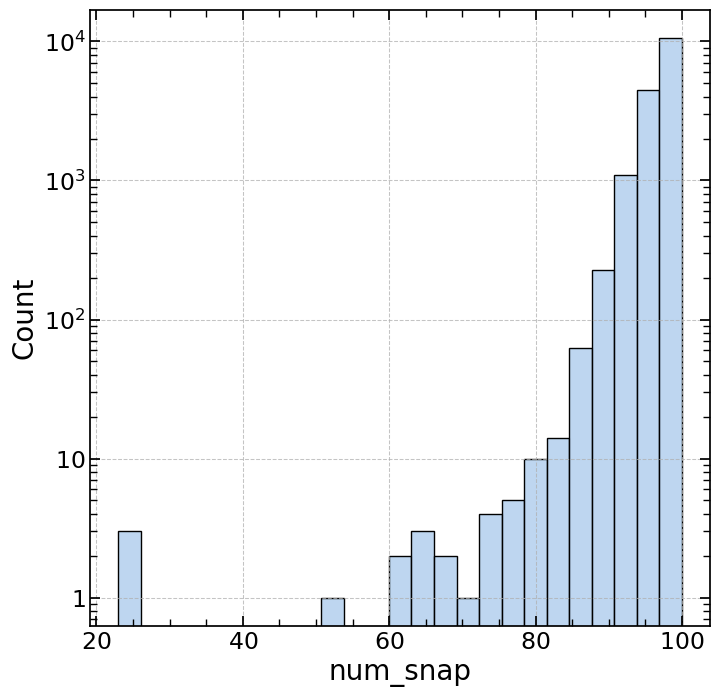

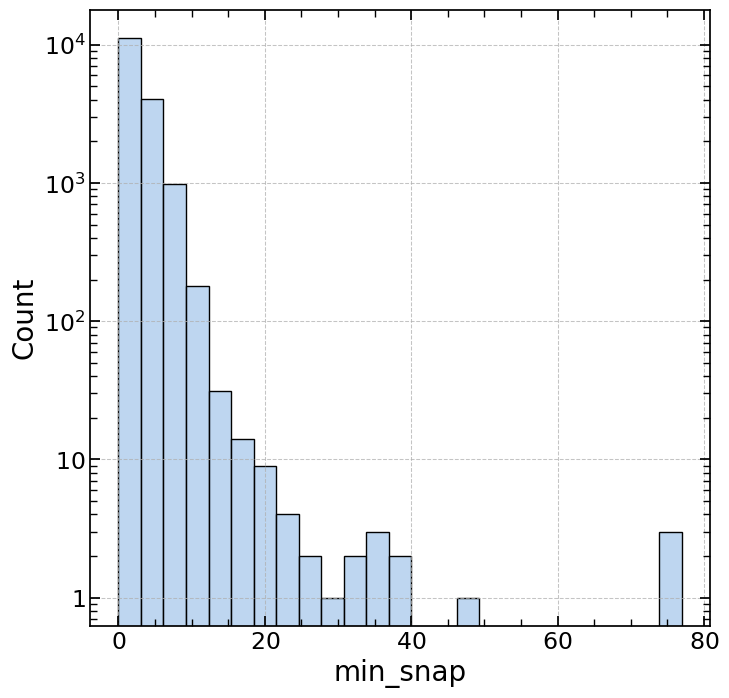

In [58]:
histories_df = pd.DataFrame(subhalos_mass_history).T
histories_df.index.name = 'subhalo_id'

#make arrays of of each column
for col in histories_df.columns:
    histories_df[col] = histories_df[col].apply(lambda x: np.array(x))

histories_df['num_snap'] =  histories_df['snap'].apply(lambda x: len(x))
histories_df['min_snap'] =  histories_df['snap'].apply(lambda x: np.min(x))

sns.histplot(histories_df['num_snap'], bins=25)
plt.yscale('log')

plt.figure()
sns.histplot(histories_df['min_snap'], bins=25)
plt.yscale('log')



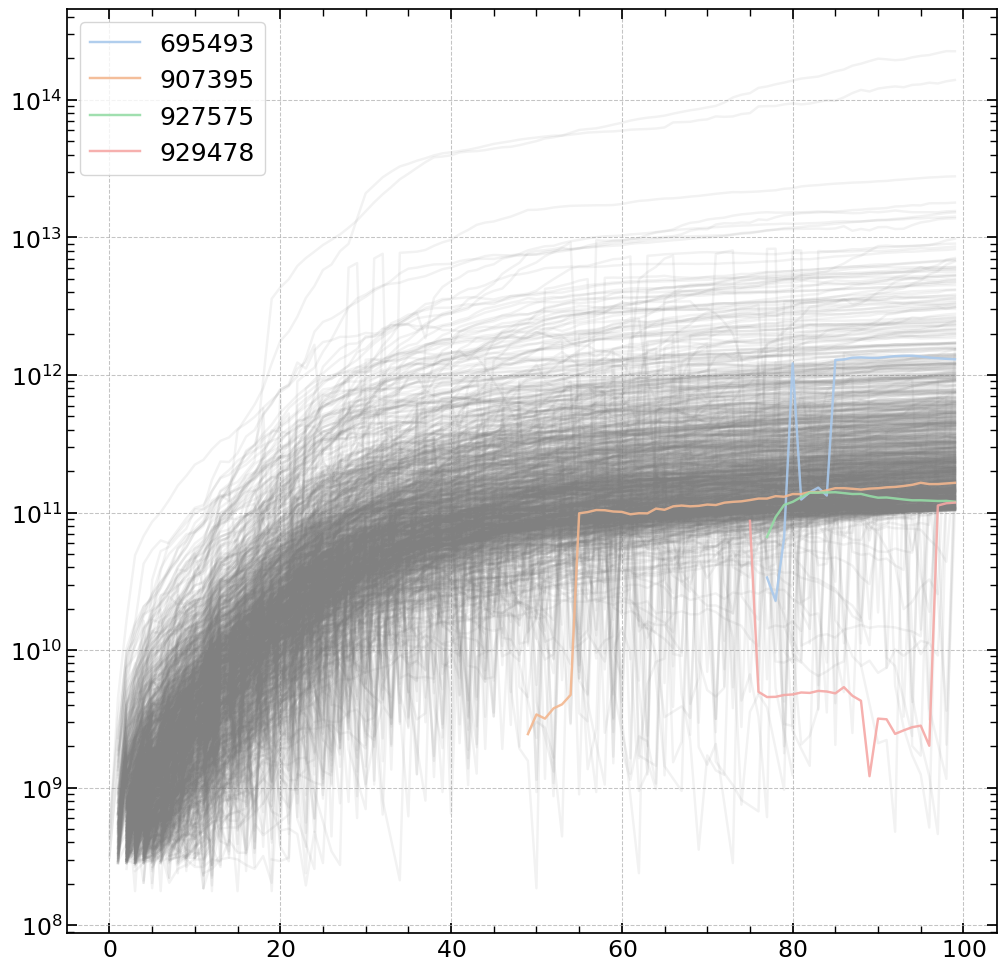

In [71]:
fig,  ax =  plt.subplots( figsize = (12,12))

for row in histories_df.sample(1000).index:
    snap = histories_df.loc[row]['snap']
    mass = histories_df.loc[row]['mass']
    ax.plot(snap, mass, alpha=0.1, color = 'gray')


for row in histories_df.query('min_snap>70 | num_snap<60').index:
    snap = histories_df.loc[row]['snap']
    mass = histories_df.loc[row]['mass']
    ax.plot(snap, mass, alpha=0.9, label=row)



ax.set_yscale('log')
ax.legend()



-----

### USING DOWNLOADED SNAPSHOTS

In [ ]:
raise Exception('stop here')

In [3]:
#downloaded_halos = os.listdir(data_path+'/')
downloaded_halos = glob(data_path+'/*_cutout.hdf5')
downloaded_halos = [halo.split('_')[1] for halo in downloaded_halos]
downloaded_halos = list([int(i) for i in downloaded_halos])
downloaded_halos.sort()

/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:267: RuntimeWarning: divide by zero encountered in log10
  proj = 'xy',
/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:267: RuntimeWarning: divide by zero encountered in log10
  proj = 'xy',
/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:267: RuntimeWarning: divide by zero encountered in log10
  proj = 'xy',


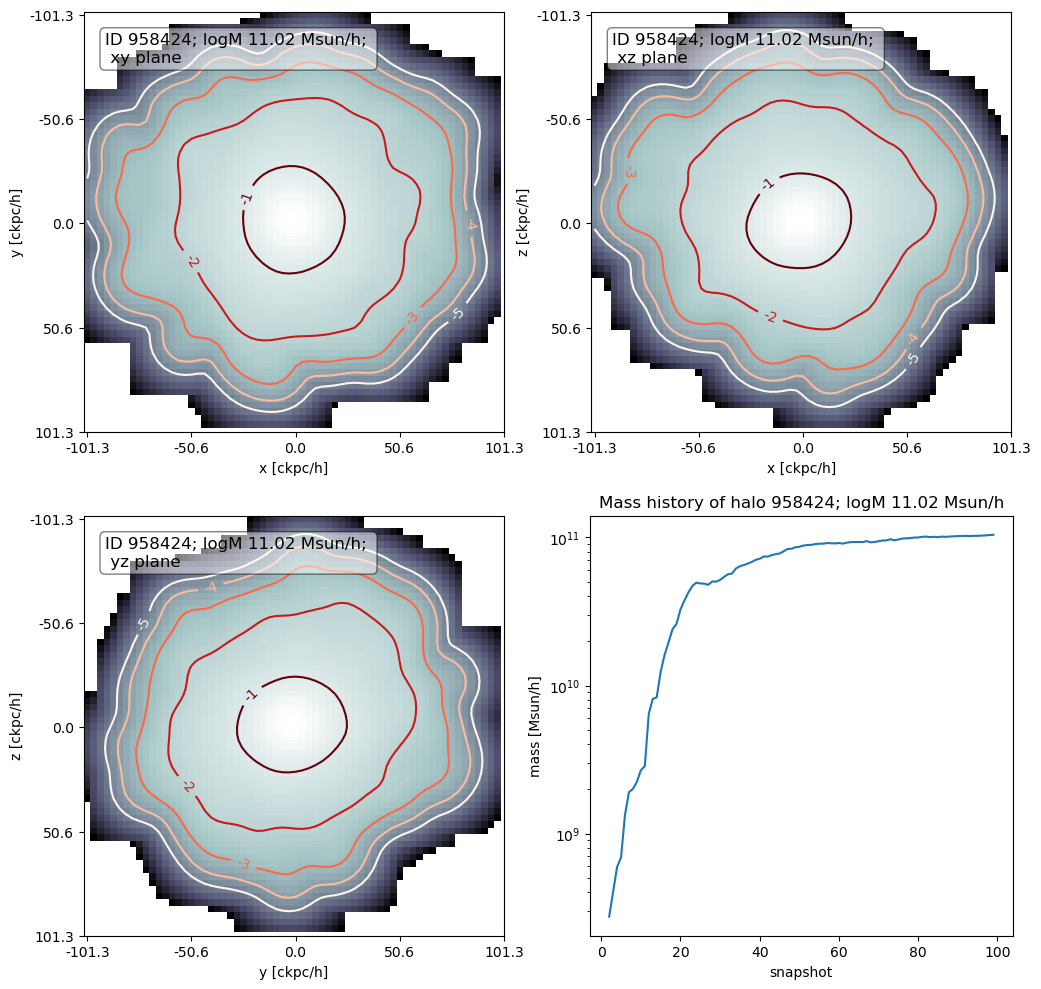

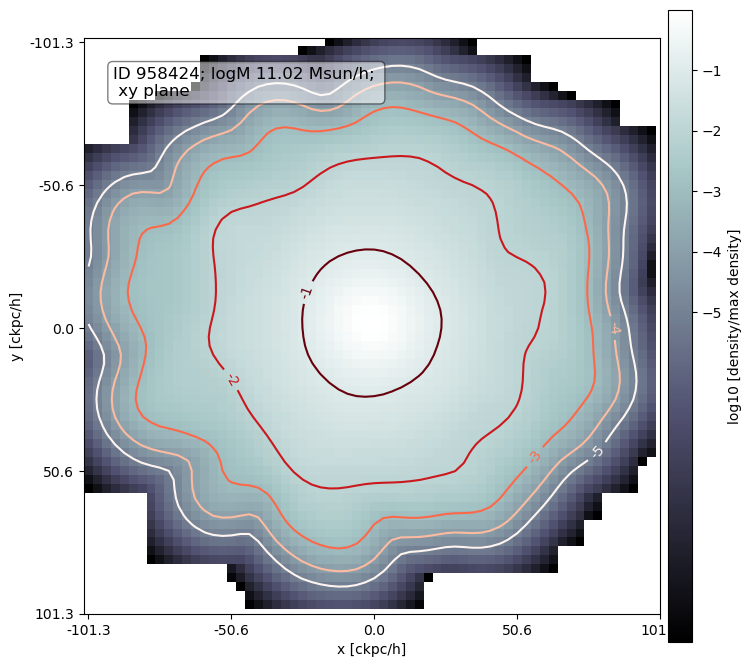

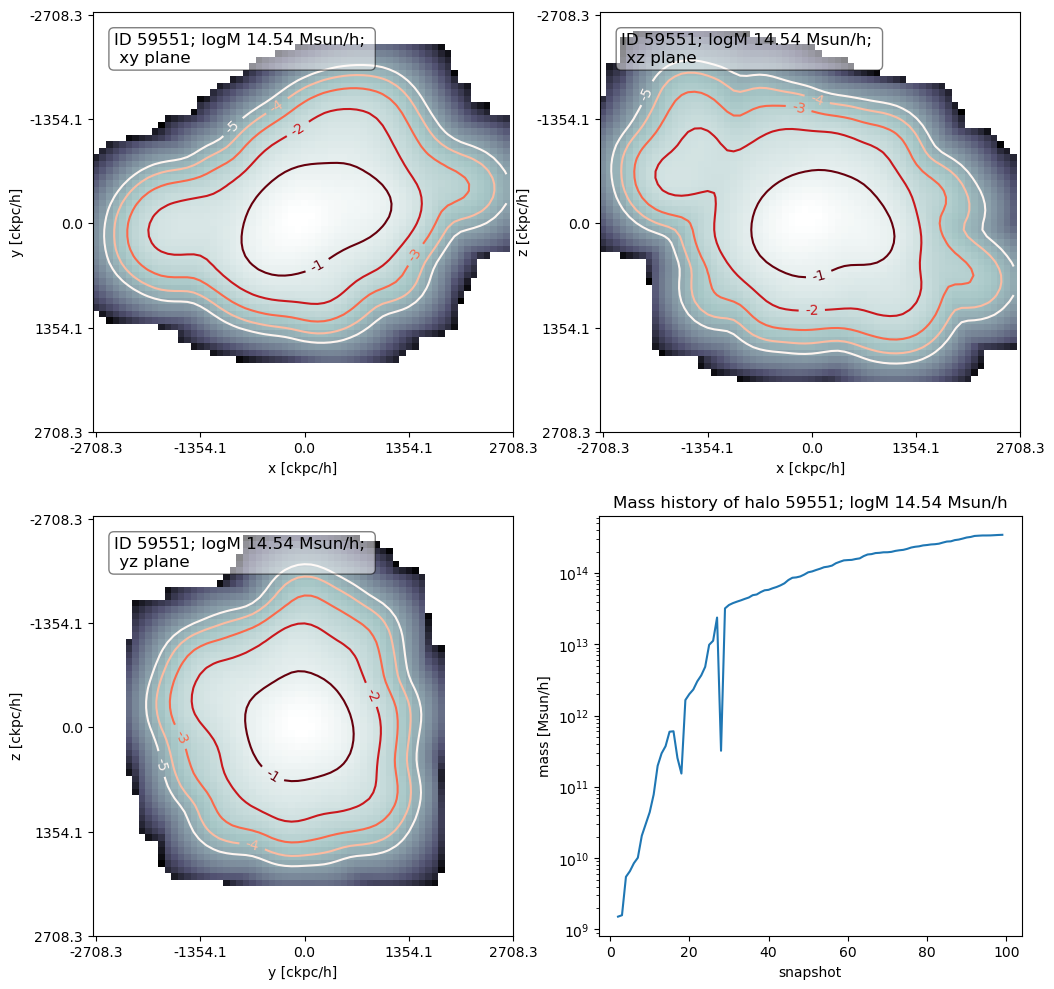

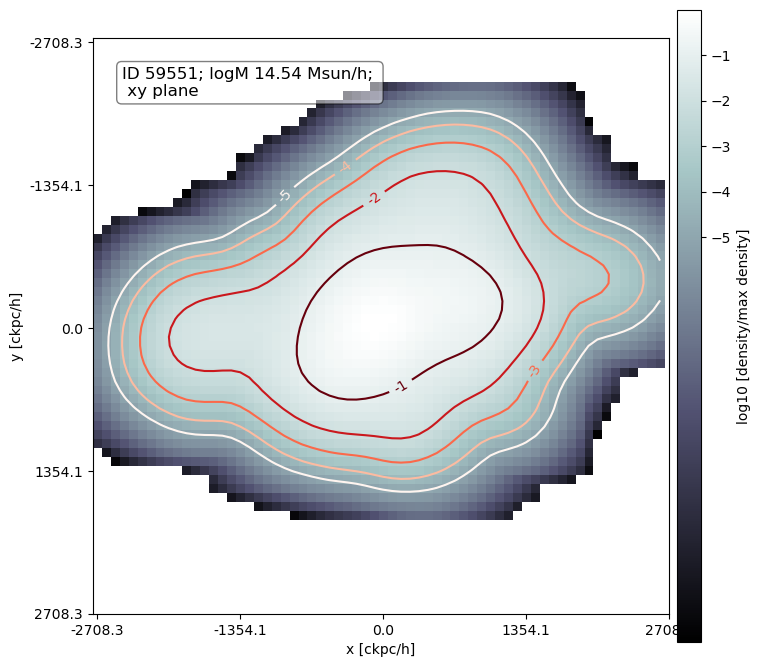

In [113]:
from utils.data.tng_query import HaloInfo

halo_lowmass = HaloInfo(958424)
halo_highmass = HaloInfo(59551)

for halo in [halo_lowmass, halo_highmass]:
    dens = halo.make_3d_density()
    halo.plot_all(dens)

In [26]:
from utils.data.tng_query import HaloInfo

halo = HaloInfo(958424)
dens = halo.make_3d_density()

hist_file = np.load(data_path[:-4]+'freya/halo_958424_hist.npz')

assert np.all(hist_file['hist'] == dens['hist']), 'error in data'

Using precomputed histogram: 958424
